# <center> Customer Churn Analysis
  <center> Denggao Jiang 
   <center> 12.03.2021
       
       
--------------

## Problem Definition

- Objective   
    Since the cost of retaining existing customers is much lower than the cost of acquiring new ones, keeping customers loyal is important to a company's success. Most businesses have many customers and cannot afford to spend much time on one customer because the cost would be too high and would outweigh the additional revenue. But if companies can predict in advance which customers are at risk of leaving, they can focus on retaining customers by focusing on these "high-risk" customers.
              
          
              
- Purpose
    - Finding out features which are most related to Churn.
    - Traning predictive model to find out customers most vulnerable to churn.
             
            
- Model
    - Logistic Regression
    - Decision Tree
    - Gaussian Naive-Bayes

## Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import suptitle
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics, model_selection
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

## Load data

In [2]:
data = pd.read_csv('Customer_Churn_Dataset.csv')
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Understanding 

In [3]:
data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Columns: 21 entries, customerID to Churn
dtypes: float64(1), int64(2), object(18)
memory usage: 1.1+ MB


- Our dataset has 7043 rows and 21 columns. 

In [4]:
print("Features:",data.columns.tolist())

Features: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [5]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# transfer totalcharges to numberic values
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [7]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [8]:
# checking missing data and dup;icated rows
print(f'Number of rows: {data.shape[0]};  Number of columns: {data.shape[1]}; Number of missing:\n{(data.isna().sum())}')
print(f'Number of rows: {data.shape[0]};  Number of columns: {data.shape[1]}; Number of duplicated rows: {data.duplicated().sum()}')

Number of rows: 7043;  Number of columns: 21; Number of missing:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64
Number of rows: 7043;  Number of columns: 21; Number of duplicated rows: 0


In [9]:
# fill null totalcharges value
data['TotalCharges'].fillna(value=data['tenure'] * data['MonthlyCharges'], inplace=True)

In [10]:
# check again
data['TotalCharges'].isna().sum()

0

In [11]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
#transforming the data
df = data.apply(LabelEncoder().fit_transform)
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,142,75,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,498,3625,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,436,537,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,266,3571,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,729,675,1


## Data Visualization

### Churn

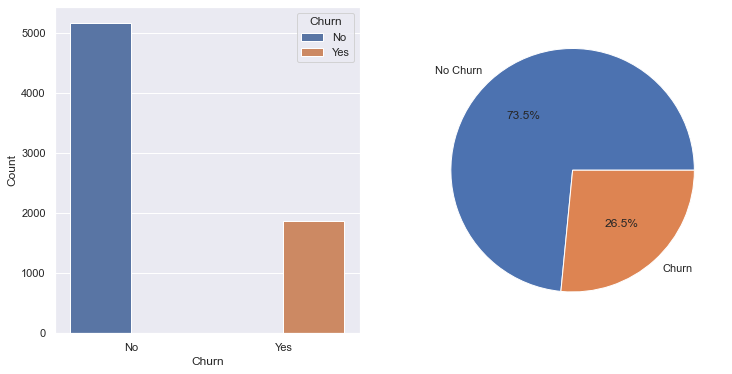

In [13]:
def Churn():
    sns.set(style="darkgrid")
    fig = plt.figure(figsize = (12, 6))
    
    plt.subplot(121)
    t = sns.countplot(data = data, x = data['Churn'], hue = data['Churn'])
    t.set_xlabel('Churn')
    t.set_ylabel('Count')
    
    plt.subplot(122)
    plt.pie(data['Churn'].value_counts(),labels = ['No Churn', 'Churn'], autopct = '%.1f%%', radius = 1)
    plt.show()

Churn()

- The left plot shows how many customers are lost, how many are not.
- The right one shows percentage of churn and non-churn customers.
- 26.5% of the customers have churned out. The other 73.4% have stayed with the company.

### Gender

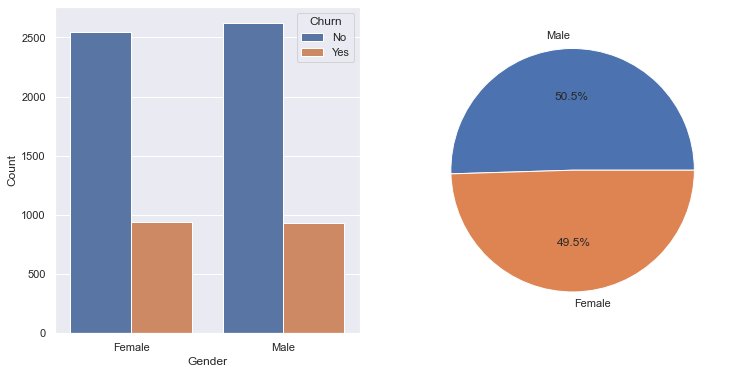

In [14]:
def Gender():
    sns.set(style="darkgrid")
    fig = plt.figure(figsize = (12, 6))
    
    plt.subplot(121)
    t = sns.countplot(data = data, x = data['gender'], hue = data['Churn'])
    t.set_xlabel('Gender')
    t.set_ylabel('Count')
    
    plt.subplot(122)
    plt.pie(data['gender'].value_counts(),labels = ['Male', 'Female'], autopct = '%.1f%%', radius = 1)
    plt.show()
    
Gender()

- Our data is almost split down the middle when comparing the gender split.

### SeniorCitizen

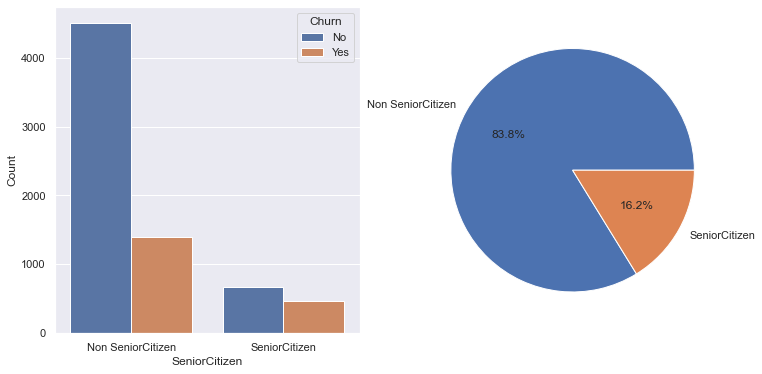

In [15]:
def SeniorCitizen():
    sns.set(style="darkgrid")
    fig = plt.figure(figsize = (12, 6))
    
    plt.subplot(121)
    t = sns.countplot(data = data, x = data['SeniorCitizen'], hue = data['Churn'])
    t.set_xlabel('SeniorCitizen')
    t.set_ylabel('Count')
    t.set_xticklabels(labels = ['Non SeniorCitizen', 'SeniorCitizen'])

    
    plt.subplot(122)
    plt.pie(data['SeniorCitizen'].value_counts(),labels = ['Non SeniorCitizen','SeniorCitizen'], autopct = '%.1f%%', radius = 1)
    plt.show()
    
SeniorCitizen()

- There are only 16 percent of our data set is seninor citizen.
- The churn rate of non senior citizen is higher than seninor citizen.

### Partner

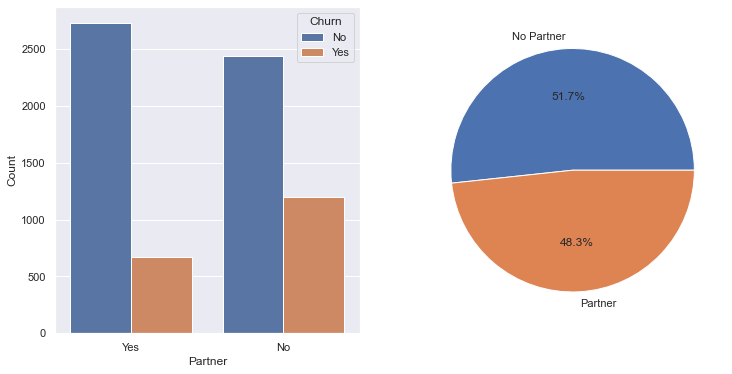

In [16]:
def Partner():
    sns.set(style="darkgrid")
    fig = plt.figure(figsize = (12, 6))
    
    plt.subplot(121)
    t = sns.countplot(data = data, x = data['Partner'], hue = data['Churn'])
    t.set_xlabel('Partner')
    t.set_ylabel('Count')
    
    plt.subplot(122)
    plt.pie(data['Partner'].value_counts(),labels = ['No Partner','Partner'], autopct = '%.1f%%', radius = 1)
    plt.show()
    
Partner()

-  Without partners are more likely to churn than those with partners.

### Dependents

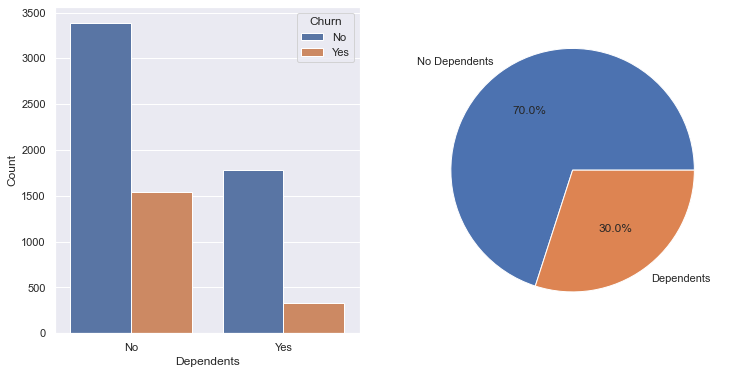

In [17]:
def Dependents():
    sns.set(style="darkgrid")
    fig = plt.figure(figsize = (12, 6))
    
    plt.subplot(121)
    t = sns.countplot(data = data, x = data['Dependents'], hue = data['Churn'])
    t.set_xlabel('Dependents')
    t.set_ylabel('Count')
    
    plt.subplot(122)
    plt.pie(data['Dependents'].value_counts(),labels = ['No Dependents','Dependents'], autopct = '%.1f%%', radius = 1)
    plt.show()
    
Dependents()

- Without dependents are more likely to churn than those with dependents

### PhoneService

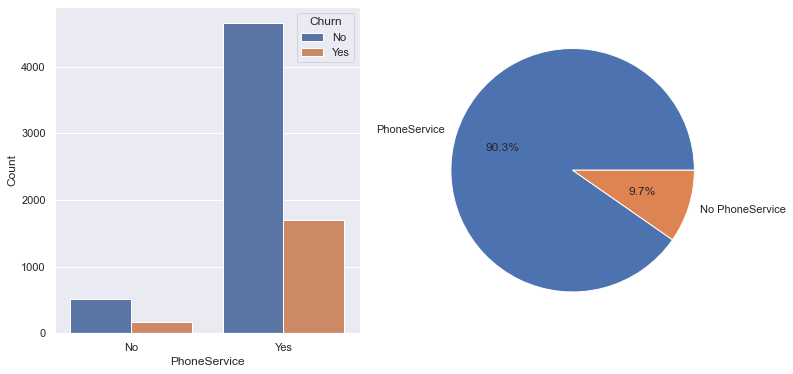

In [18]:
def PhoneService():
    sns.set(style="darkgrid")
    fig = plt.figure(figsize = (12, 6))
    
    plt.subplot(121)
    t = sns.countplot(data = data, x = data['PhoneService'], hue = data['Churn'])
    t.set_xlabel('PhoneService')
    t.set_ylabel('Count')
    
    plt.subplot(122)
    plt.pie(data['PhoneService'].value_counts(),labels = ['PhoneService','No PhoneService'], autopct = '%.1f%%', radius = 1)
    plt.show()
    
PhoneService()

- Without Phone Service are more likely to churn than those with Phone Service.

### MultipleLines

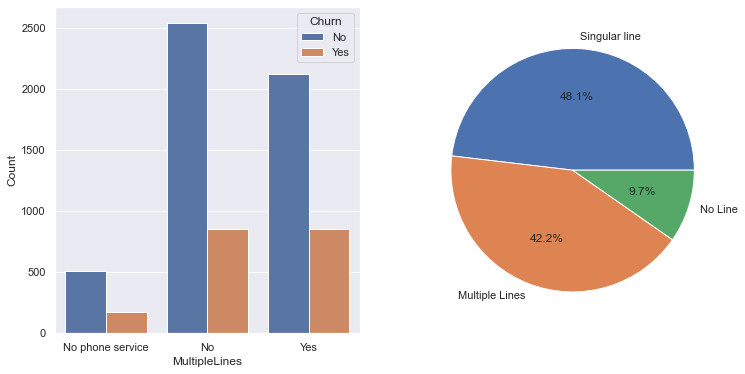

In [19]:
def MultipleLines():
    sns.set(style="darkgrid")
    fig = plt.figure(figsize = (12, 6))
    
    plt.subplot(121)
    t = sns.countplot(data = data, x = data['MultipleLines'], hue = data['Churn'])
    t.set_xlabel('MultipleLines')
    t.set_ylabel('Count')
    
    plt.subplot(122)
    plt.pie(data['MultipleLines'].value_counts(),labels = ['Singular line','Multiple Lines','No Line'], autopct = '%.1f%%', radius = 1)
    plt.show()
    
MultipleLines()

- The churn rate for customers with multiple lines is about the same as for customers with a single line.

### InternetService

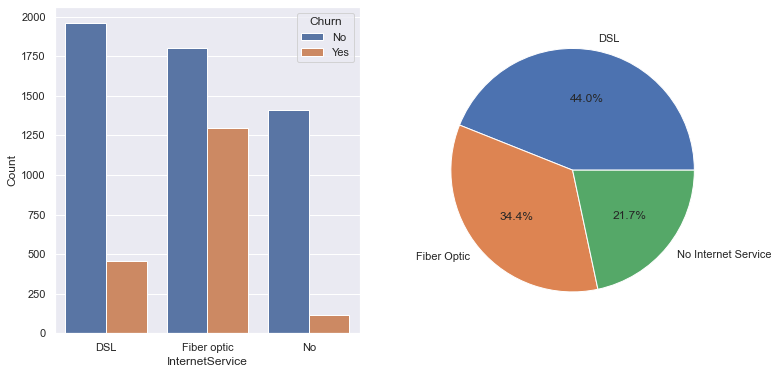

In [20]:
def InternetService():
    sns.set(style="darkgrid")
    fig = plt.figure(figsize = (12, 6))
    
    plt.subplot(121)
    t = sns.countplot(data = data, x = data['InternetService'], hue = data['Churn'])
    t.set_xlabel('InternetService')
    t.set_ylabel('Count')
    
    plt.subplot(122)
    plt.pie(data['InternetService'].value_counts(),labels = ['DSL','Fiber Optic','No Internet Service'], autopct = '%.1f%%', radius = 1)
    plt.show()
    
InternetService()

- Fiber optic is more likely to leave.

### Other Services

In [21]:
cols = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
df1 = data[(data['InternetService'] != 'No') & (data['Churn'] == 'Yes')]
df1 = pd.melt(df1[cols]).rename({'value': 'Other Services'}, axis=1)

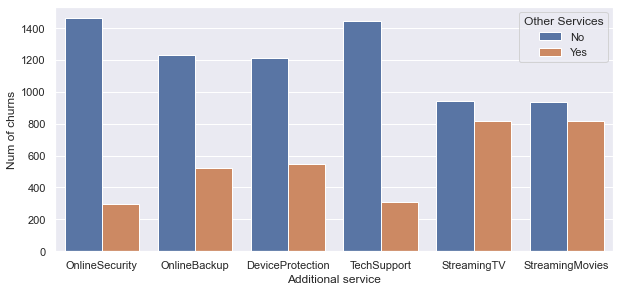

In [22]:
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Other Services', hue_order=['No', 'Yes'])
ax.set(xlabel='Additional service', ylabel='Num of churns')
plt.show()

- Customers with the security, backup, protection, techsupport services are less likely to churn.

### Contract

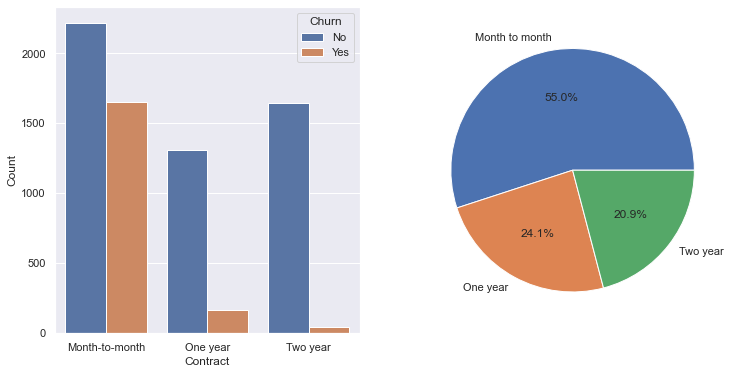

In [23]:
def Contract():
    sns.set(style="darkgrid")
    fig = plt.figure(figsize = (12, 6))
    
    plt.subplot(121)
    t = sns.countplot(data = data, x = data['Contract'], hue = data['Churn'])
    t.set_xlabel('Contract')
    t.set_ylabel('Count')
    
    plt.subplot(122)
    plt.pie(data['Contract'].value_counts(),labels = ['Month to month','One year','Two year'], autopct = '%.1f%%', radius = 1)
    plt.show()
    
Contract()

- Monthly customers are most likely to leave.

### PaperlessBilling

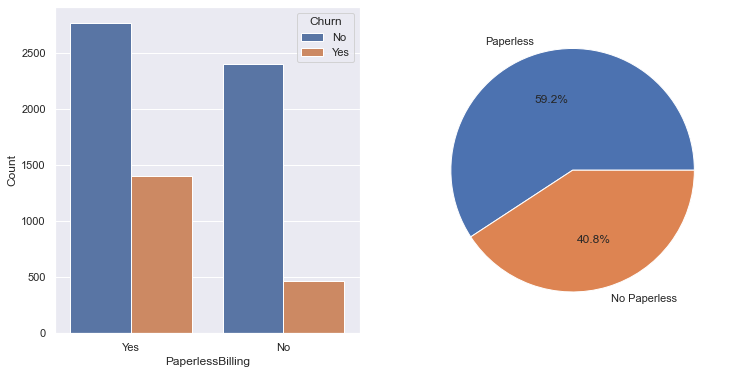

In [24]:
def PaperlessBilling():
    sns.set(style="darkgrid")
    fig = plt.figure(figsize = (12, 6))
    
    plt.subplot(121)
    t = sns.countplot(data = data, x = data['PaperlessBilling'], hue = data['Churn'])
    t.set_xlabel('PaperlessBilling')
    t.set_ylabel('Count')
    
    plt.subplot(122)
    plt.pie(data['PaperlessBilling'].value_counts(),labels = ['Paperless','No Paperless'], autopct = '%.1f%%', radius = 1)
    plt.show()
    
PaperlessBilling()

- Paperless customers more likely to leave than non paperless customers.

### PaymentMethod

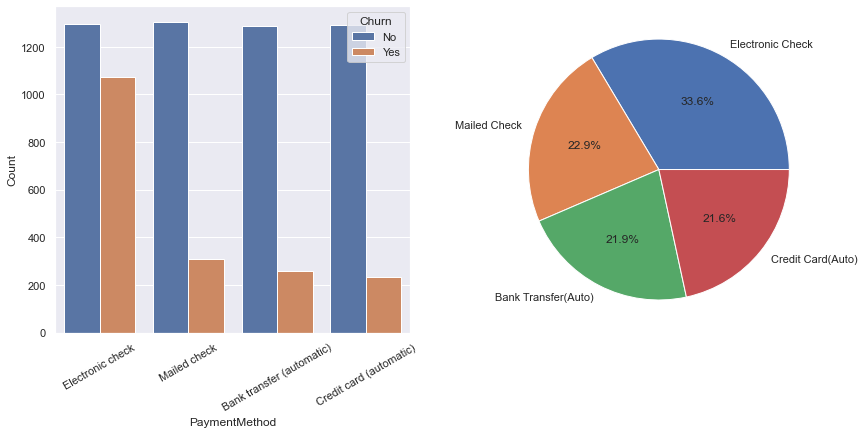

In [25]:
def PaymentMethod():
    sns.set(style="darkgrid")
    fig = plt.figure(figsize = (14, 6))
    
    plt.subplot(121)
    t = sns.countplot(data = data, x = data['PaymentMethod'], hue = data['Churn'])
    t.set_xlabel('PaymentMethod')
    t.set_ylabel('Count')
    t.set_xticklabels(t.get_xticklabels(),rotation=30)
    
    plt.subplot(122)
    plt.pie(data['PaymentMethod'].value_counts(),labels = ['Electronic Check', 
        'Mailed Check', 'Bank Transfer(Auto)', 'Credit Card(Auto)'], autopct = '%.1f%%', radius = 1)
    plt.show()
    
PaymentMethod()

- Customers who pay by electronic check have a higher churn rate than those who pay by all other ways.

### tenure

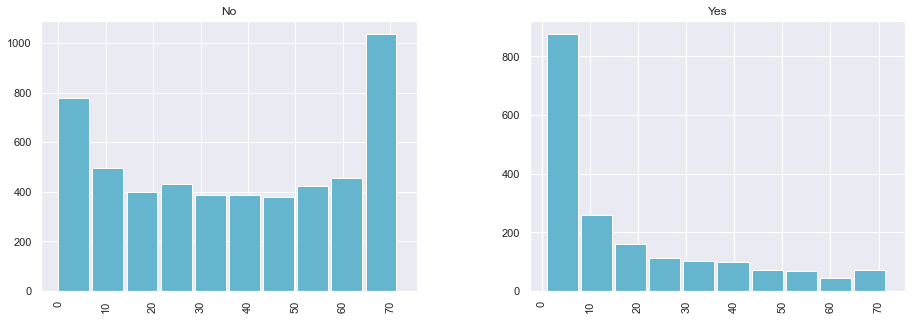

In [26]:
fig=data['tenure'].hist(by=data['Churn'],figsize=(15,5),width=6.5,color='c')
plt.show()

- The bar peaks at 70 months, then less than 10 months. This could mean that most of the customers who stay with the company are either new or have been with the company for about six years, their most loyal customers.

### kdeplot

In [27]:
def kdeplot(f):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(f))
    ax0 = sns.kdeplot(data[data['Churn'] == 'No'][f],color= 'navy',label='Churn: No')
    ax1 = sns.kdeplot(data[data['Churn'] == 'Yes'][f], color= 'orange',label='Churn: Yes')
    plt.legend()
    plt.show()

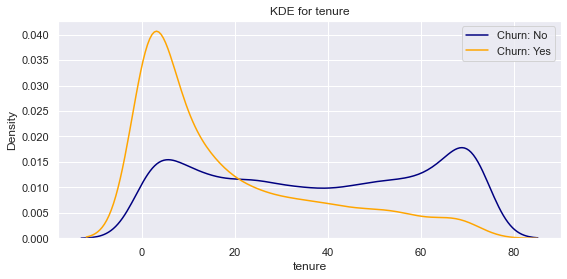

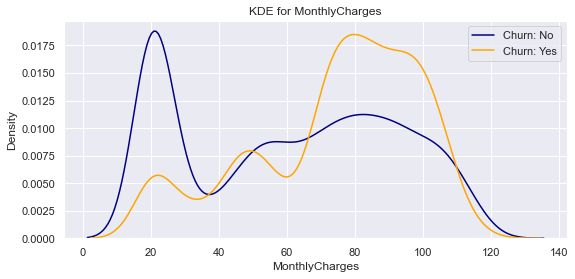

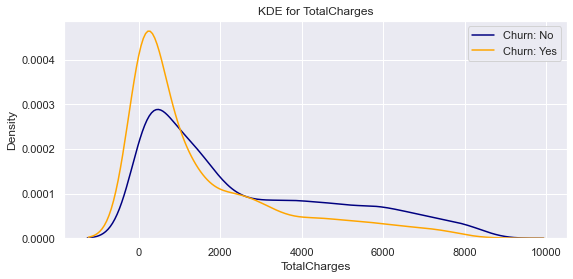

In [28]:
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

- New customers are more likely to leave
- Customers with higher monthly charges are more likely to leave

### Correlation 

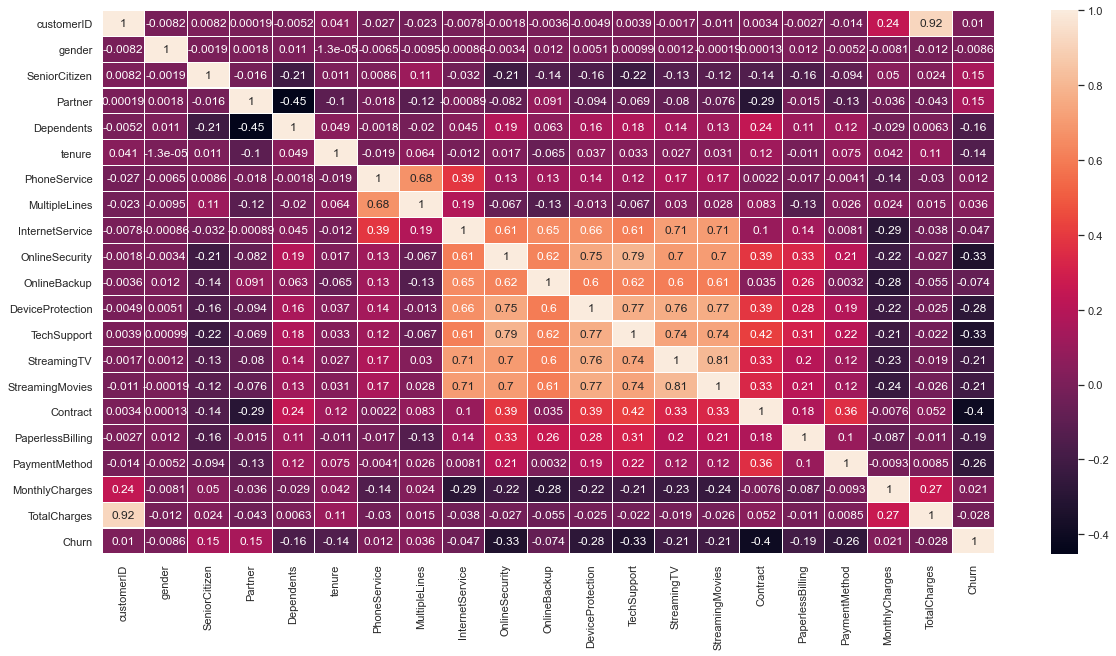

In [29]:
plt.figure(figsize=(20, 10))
corr = data.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=0.1,annot=True)

- This plot shows the relation of each features.


<AxesSubplot:>

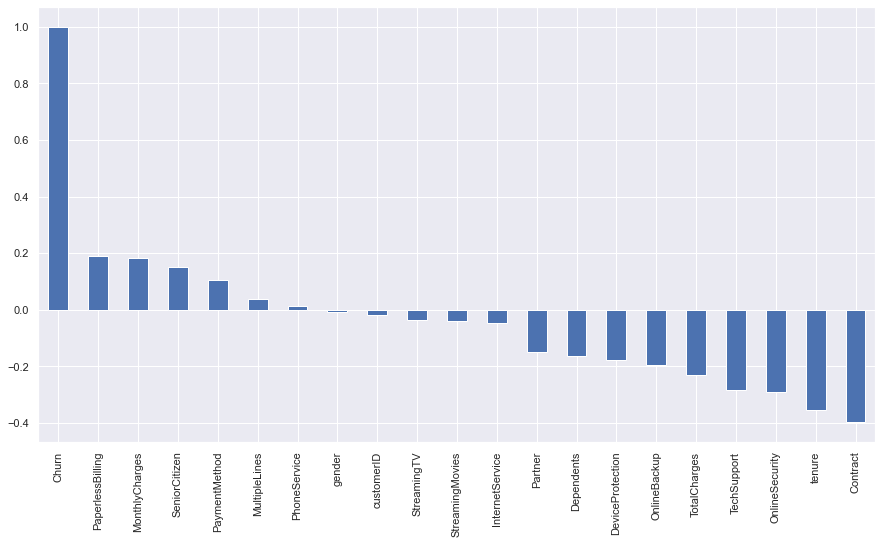

In [30]:
plt.figure(figsize=(15,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

- This plot shows correlation of "Churn" with other features.
- PaperlessBilling, MonthlyCharges and SeniorCitizen are most positive related features.
- Contract, tenure, OnlineSecurity and TechSupport are most negative related features.

## Data Preparation

In [31]:
# remove customer ID & Total Charges
data = data.loc[:, (data.columns != 'customerID') & (data.columns != 'TotalCharges')]

- Customer ID is not helpful for training the model.
- TotalCharges = MonthlyCharges ✖️ Tenure. To avoid multicollinearity, we remove it in our analysis.

In [32]:
#Splitting the dataset into train & test
X = df.iloc[:,:-1]
y = df[["Churn"]]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=0,stratify=y)

In [33]:
# normlizaing data
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

## Model Building & Evaluation
### Logistic Regression
#### Model

In [34]:
lr = LogisticRegression(penalty="l2")
lr.fit(X_train_std,y_train)

y_pred_lr = lr.predict(X_test_std)

train_acc_log = round((lr.score(X_train_std, y_train))*100,1)
test_acc_log = round((lr.score(X_test_std, y_test))*100,1)

print('Training accuracy:', train_acc_log)
print('Test accuracy:', test_acc_log)

Training accuracy: 81.0
Test accuracy: 80.4


#### ROC Curve

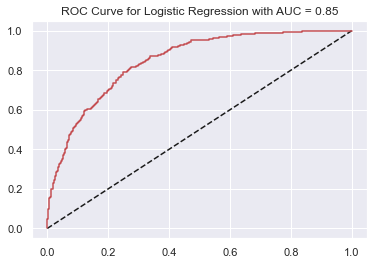

In [35]:
preds = lr.predict_proba(X_test_std)[:,1]
fpr_lr, tpr_lr, thresholds = roc_curve(y_test, preds)
roc_data = pd.DataFrame(dict(fpr=fpr_lr,tpr=tpr_lr))
roc_lr = round(auc(fpr_lr,tpr_lr),2)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_lr, tpr_lr,'r')
plt.title(("ROC Curve for Logistic Regression with AUC = %s"% str(roc_lr)))
plt.show()

#### Cross Validation (k=10)

In [36]:
X_cro = X.values
y_cro = y.values.flatten()

predicted = model_selection.cross_val_predict(LogisticRegression(), X_cro, y_cro, cv=10)
lr_cv_score = round(metrics.accuracy_score(y_cro, predicted)*100,1)

print('Logistic Regression score after using Cross Validation (k=10) is : %s %%' % lr_cv_score)

Logistic Regression score after using Cross Validation (k=10) is : 80.0 %


#### Classification Report

In [37]:
print(classification_report(y_test, y_pred_lr,target_names=['No','Yes']))

              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1552
         Yes       0.67      0.53      0.59       561

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.79      0.80      0.80      2113



#### Confusion Matrix

In [38]:
confusion_matrix_lr = metrics.confusion_matrix(y_pred_lr, y_test, [1,0])
print(confusion_matrix_lr)

[[ 296  149]
 [ 265 1403]]


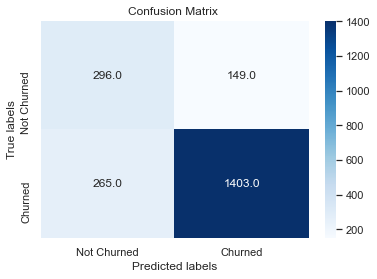

In [39]:
ax= plt.subplot()
sns.heatmap(confusion_matrix_lr,cmap="Blues",annot=True,fmt='.1f', ax = ax)

labels = ['Not Churned', 'Churned']
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix ');

#### Couclusion
- Logistic Regression's model accuracy is around 80%. AUC (area under the curve) is 84%.
- This model identify the stayed customers better than churn customers.

### Decision Tree
#### Model

In [40]:
dt = tree.DecisionTreeClassifier()
dt.fit(X_train_std,y_train)

y_pred_dt = dt.predict(X_test_std)

train_acc_dt = round((dt.score(X_train_std, y_train))*100,1)
test_acc_dt = round((dt.score(X_test_std, y_test))*100,1)

print("Training accuracy:", train_acc_dt)
print('Test accuracy:', test_acc_dt)

Training accuracy: 100.0
Test accuracy: 72.8


#### ROC Curve

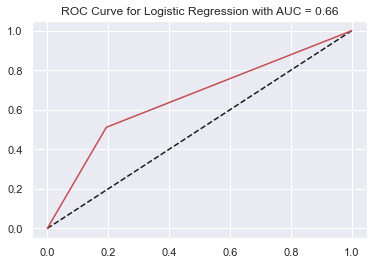

In [41]:
preds = dt.predict_proba(X_test_std)[:,1]
fpr_dt, tpr_dt, thresholds = roc_curve(y_test, preds)
roc_data = pd.DataFrame(dict(fpr=fpr_dt,tpr=tpr_dt))
roc_dt = round(auc(fpr_dt,tpr_dt),2)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_dt, tpr_dt,'r')
plt.title(("ROC Curve for Logistic Regression with AUC = %s"%str(roc_dt)))
plt.show()

#### Cross Validation (k=10)

In [42]:
X_cro = X.values
y_cro = y.values.flatten()

predicted = model_selection.cross_val_predict(tree.DecisionTreeClassifier(), X_cro, y_cro, cv=10)
dt_cv_score = round(metrics.accuracy_score(y_cro, predicted)*100,1)

print('Decision Tree score after using Cross Validation (k=10) is : %s %%' % dt_cv_score)

Decision Tree score after using Cross Validation (k=10) is : 72.8 %


#### Classification Report

In [43]:
print(classification_report(y_test, y_pred_dt,target_names=['No','Yes']))

              precision    recall  f1-score   support

          No       0.82      0.81      0.81      1552
         Yes       0.49      0.51      0.50       561

    accuracy                           0.73      2113
   macro avg       0.65      0.66      0.66      2113
weighted avg       0.73      0.73      0.73      2113



#### Confusion Matrix

In [44]:
confusion_matrix_dt = metrics.confusion_matrix(y_pred_dt, y_test, [1,0])
print(confusion_matrix_dt)

[[ 287  301]
 [ 274 1251]]


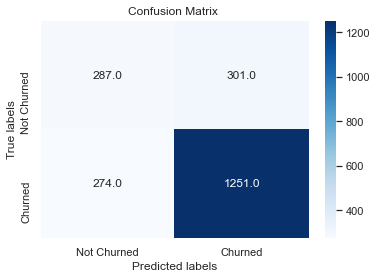

In [45]:
ax= plt.subplot()
sns.heatmap(confusion_matrix_dt,cmap="Blues",annot=True,fmt='.1f', ax = ax)

labels = ['Not Churned', 'Churned']
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix ');

#### Conclusion
- Our decision tree classifier is a bit disappointing. The accuracy of the test was only 72.5%, the data of 10 times cross-validation was similar (73%) and the ROC Curve was 66%.

### Gaussian Naive-Bayes
#### Model

In [46]:
gnb = GaussianNB()
gnb.fit(X_train_std,y_train)

y_pred_gnb = gnb.predict(X_test_std)

train_acc_gnb = round((gnb.score(X_train_std, y_train))*100,1)
test_acc_gnb = round((gnb.score(X_test_std, y_test))*100,1)

print("Training accuracy:", train_acc_gnb)
print('Test accuracy:', test_acc_gnb)

Training accuracy: 76.0
Test accuracy: 75.2


#### ROC Curve

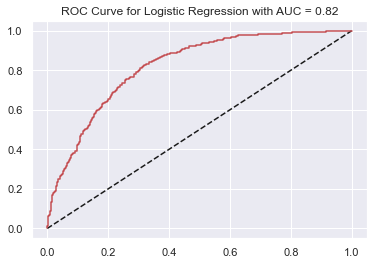

In [47]:
preds = gnb.predict_proba(X_test_std)[:,1]
fpr_gnb, tpr_gnb, thresholds = roc_curve(y_test, preds)
roc_data = pd.DataFrame(dict(fpr=fpr_gnb,tpr=tpr_gnb))
roc_gnb = round(auc(fpr_gnb,tpr_gnb),2)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_gnb, tpr_gnb,'r')
plt.title(("ROC Curve for Logistic Regression with AUC = %s"%str(roc_gnb)))
plt.show()

#### Cross Validation (k=10)

In [48]:
X_cro = X.values
y_cro = y.values.flatten()

predicted = model_selection.cross_val_predict(tree.DecisionTreeClassifier(), X_cro, y_cro, cv=10)
gnb_cv_score = round(metrics.accuracy_score(y_cro, predicted)*100,1)

print("Naive Bayes score after using Cross Validation (k=10) is : %s %%"% gnb_cv_score)

Naive Bayes score after using Cross Validation (k=10) is : 72.5 %


#### Classification Report

In [49]:
print(classification_report(y_test, y_pred_gnb,target_names=['No','Yes']))

              precision    recall  f1-score   support

          No       0.88      0.77      0.82      1552
         Yes       0.53      0.71      0.60       561

    accuracy                           0.75      2113
   macro avg       0.70      0.74      0.71      2113
weighted avg       0.79      0.75      0.76      2113



#### Confusion Matrix

In [50]:
confusion_matrix_gnb = metrics.confusion_matrix(y_pred_gnb, y_test, [1,0])
print(confusion_matrix_dt)

[[ 287  301]
 [ 274 1251]]


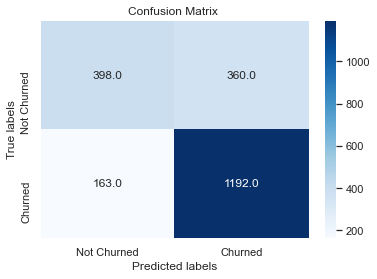

In [51]:
ax= plt.subplot()
sns.heatmap(confusion_matrix_gnb,cmap="Blues",annot=True,fmt='.1f', ax = ax)

labels = ['Not Churned', 'Churned']
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix ');

#### Conclusion
- The model's accuracy is around 75%.

## Model Comparison

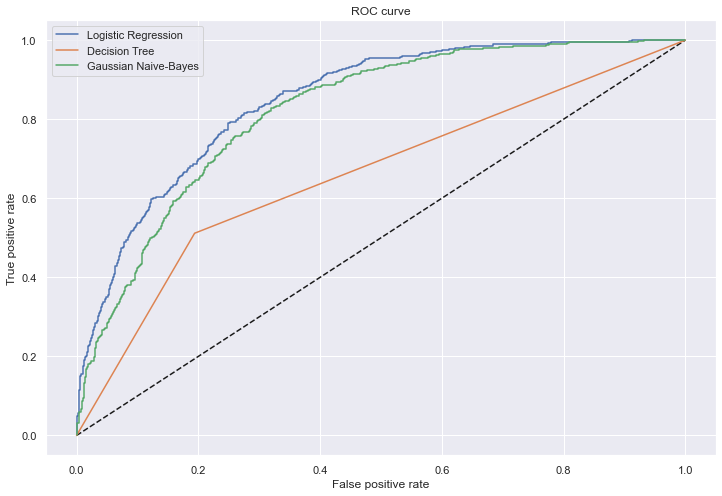

In [52]:
plt.figure(figsize=(12, 8))

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot(fpr_gnb, tpr_gnb, label='Gaussian Naive-Bayes')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')

plt.show()

In [53]:
model = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree','Gaussian Naive-Bayes'],
    'Testing Score': [test_acc_log, test_acc_dt,test_acc_gnb],
    'K Fold Cross Validations (k=10)': [lr_cv_score, dt_cv_score,gnb_cv_score],
    'AUC': [roc_lr, roc_dt,roc_gnb]})

model

,Model,Testing Score,K Fold Cross Validations (k=10),AUC
0,Logistic Regression,80.4,80.0,0.85
1,Decision Tree,72.8,72.8,0.66
2,Gaussian Naive-Bayes,75.2,72.5,0.82


## Conclusion

- We select some features which are most related our target variable Churn.
    - PaperlessBilling, MonthlyCharges and SeniorCitizen are most positive related features.
        - Paperless customers more likely to leave than non paperless customers.
        - Customers with higher monthly charges are more likely to leave
        - The churn rate of non senior citizen is higher than seninor citizen.
    - Contract, tenure, OnlineSecurity and TechSupport are most negative related features.
        - Monthly contract customers are most likely to leave.
        - Most of the customers who stay with the company are either new or have been with the company for about six years.
        - No Online Security and Tech Support services are more likely to leave.
         
         
- As we can see, the best model is the Logistic Regression, which has 80.4% testing score and 85% AUC score.


- Future jobs:
    - I want to optimize the model's data, making Churn data more even.
    - Invest more time in feature engineering, trying to include more important features from other data sets or create new features.
